In [83]:
# import the necessary packages
from skimage import feature
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline  
import cv2
import os
import time
import matplotlib.image as mpimg

In [84]:
class LocalBinaryPatterns:
    def __init__(self, numPoints, radius):
        # store the number of points and radius
        self.numPoints = numPoints
        self.radius = radius
 
    def describe(self, image, eps=1e-7):
        # compute the Local Binary Pattern representation
        # of the image, and then use the LBP representation
        # to build the histogram of patterns
        lbp = feature.local_binary_pattern(image, self.numPoints, self.radius, method="uniform")
        (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, self.numPoints + 3), range=(0, self.numPoints + 2))
        
        # For every region all non-uniform patterns (more than two transitions) are labeled with one single label.
        # This means that every regional histogram consists of P
        # (P − 1) + 3 bins: P (P − 1) bins for the patterns with two
        # transitions, two bins for the patterns with zero transitions
        # and one bin for all non-uniform patterns. 
 
        # normalize the histogram
        hist = hist.astype("float")
        hist /= (hist.sum() + eps)
 
        # return the histogram of Local Binary Patterns
        return hist

In [85]:
# Directories of sand and pebbel images
sand = "sand1/"
files_sand = os.listdir(sand)
pebbel = "pebble1/"
files_pebbel = os.listdir(pebbel)

In [86]:
files_pebbel, files_sand

(['p19.png',
  'p4.jpg',
  'p12.png',
  'p10.png',
  'p16.jpg',
  'p15.png',
  'p3.png',
  'p18.png',
  'p7.jpg',
  'p2.jpg',
  'p20.png',
  'p23.png',
  'p22.png',
  'p9.png',
  'p25.jpg',
  'p17.jpeg',
  'p8.jpg',
  'p21.png',
  'p11.png',
  'p5.jpeg',
  'p6.jpeg',
  'p13.png',
  'p14.png',
  'p1.jpg',
  'p24.png'],
 ['s20.png',
  's15.png',
  's30.png',
  's11.jpg',
  's31.jpg',
  's9.jpg',
  's26.png',
  's22.png',
  's7.png',
  's29.png',
  's1.jpg',
  's28.png',
  's14.png',
  's27.png',
  's12.png',
  's17.png',
  's3.jpg',
  's16.png',
  's8.jpg',
  's13.png',
  's18.png',
  's21.png',
  's2.JPG',
  's6.png',
  's5.png',
  's4.jpg',
  's19.png',
  's25.png',
  's10.jpg',
  's24.png',
  's23.png'])

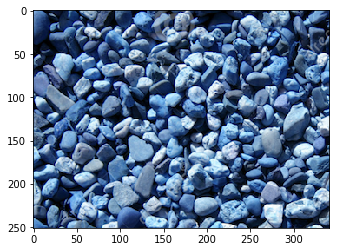

In [87]:
image1 = cv2.imread("pebble1/" + files_pebbel[21])
plt.imshow(image1)

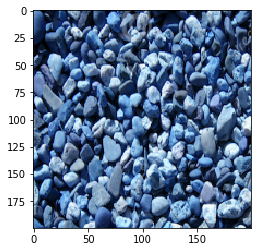

In [88]:
image = cv2.resize(image1, (200, 200))
plt.imshow(image)

In [99]:
# Initialize the local binary patterns descriptor along with
# the data and label lists
desc = LocalBinaryPatterns(8, 1)
data = []
labels = []

# loop over the training images of sand
for i in range(0,28):
    print(i)
    print(files_sand[i])
    # load the image, convert it to grayscale, and describe it
    image = cv2.imread("sand1/" + files_sand[i])
    image = cv2.resize(image, (100, 100))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = desc.describe(gray)
 
    # extract the label from the image path, then update the
    # label and data lists
    labels.append("s")
    data.append(hist)
    
# loop over the training images of pebbel
for i in range(0, 21):
    print(i)
    print(files_pebbel[i])
    # load the image, convert it to grayscale, and describe it
    image = cv2.imread("pebble1/" + files_pebbel[i])
    image = cv2.resize(image, (100, 100))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = desc.describe(gray)
 
    # extract the label from the image path, then update the
    # label and data lists
    labels.append("p")
    data.append(hist)


0
s20.png
1
s15.png
2
s30.png
3
s11.jpg
4
s31.jpg
5
s9.jpg
6
s26.png
7
s22.png
8
s7.png
9
s29.png
10
s1.jpg
11
s28.png
12
s14.png
13
s27.png
14
s12.png
15
s17.png
16
s3.jpg
17
s16.png
18
s8.jpg
19
s13.png
20
s18.png
21
s21.png
22
s2.JPG
23
s6.png
24
s5.png
25
s4.jpg
26
s19.png
27
s25.png
0
p19.png
1
p4.jpg
2
p12.png
3
p10.png
4
p16.jpg
5
p15.png
6
p3.png
7
p18.png
8
p7.jpg
9
p2.jpg
10
p20.png
11
p23.png
12
p22.png
13
p9.png
14
p25.jpg
15
p17.jpeg
16
p8.jpg
17
p21.png
18
p11.png
19
p5.jpeg
20
p6.jpeg


In [100]:
# train a Linear SVM on the data
model = SVC(C=200.0, random_state=42, probability = True)
model.fit(data, labels)

SVC(C=200.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

5 false counts


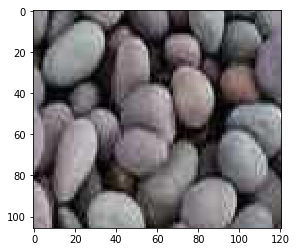

In [101]:
# loop over the testing images for pebbel images
count = 0
for i in range(0,25):
    # load the image, convert it to grayscale, describe it,
    # and classify it
    image = mpimg.imread("pebble1/" + files_pebbel[i])
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = desc.describe(gray)
    prediction = model.predict(hist.reshape(1, -1) )[0]
 
    # display the image and the prediction
    plt.imshow(image)
    #cv2.waitKey(0)
    #print(prediction)
    if(prediction == 's'):
        count+=1
        
print(str(count) + " false counts")

7 false counts


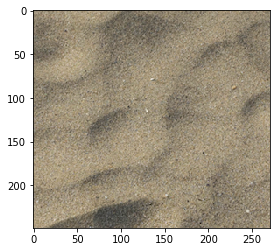

In [102]:
# loop over the testing images for sand images
count = 0
for i in range(0,28):
    # load the image, convert it to grayscale, describe it,
    # and classify it
    image = mpimg.imread("sand1/" + files_sand[i])
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = desc.describe(gray)
    prediction = model.predict(hist.reshape(1, -1) )[0]
 
    # display the image and the prediction
    plt.imshow(image)
    #print(prediction)
    if(prediction == 'p'):
        count+=1

print(str(count) + " false counts")

p


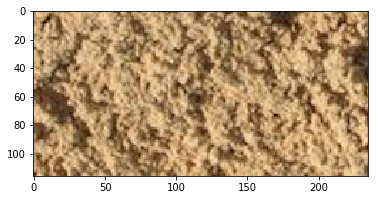

In [73]:
image = mpimg.imread("sand1/" + files_sand[0])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist = desc.describe(gray)
prediction = model.predict(hist.reshape(1, -1) )[0]
plt.imshow(image)
print(prediction)

In [41]:
files_sand[31]

IndexError: list index out of range

In [46]:
# Define sliding window function
def sliding_window(image, stepSize, windowSize):
    # slide a window across the image
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            # yield the current window
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

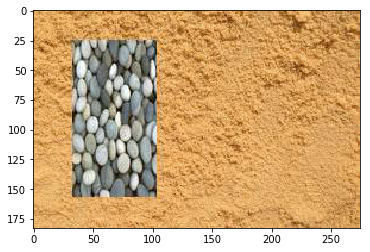

In [47]:
# Load image which contains pebbels in the sand
img = mpimg.imread("sand_pebbel_3.jpg")
plt.imshow(img)

In [48]:
winW = 16
winH = 16
points_left = []
points_right = []
winW_sub = 32
winH_sub = 32
stepSize_sub = 32
s=0

In [49]:
for (x, y, window) in sliding_window(img, stepSize=8, windowSize=(winW, winH)):
        # if the window does not meet our desired window size, ignore it
        if window.shape[0] != winH or window.shape[1] != winW:
            continue
 
        # THIS IS WHERE YOU WOULD PROCESS YOUR WINDOW, SUCH AS APPLYING A
        # MACHINE LEARNING CLASSIFIER TO CLASSIFY THE CONTENTS OF THE
        # WINDOW
 
        # since we do not have a classifier, we'll just draw the window
        # clone = resized.copy()
        gray = cv2.cvtColor(window, cv2.COLOR_BGR2GRAY)
        hist = desc.describe(gray)
        prediction = model.predict(hist.reshape(1, -1) )[0]
        s=0
        
        if prediction == "p":
            if model.predict_proba(hist.reshape(1, -1) )[0][0] > 0.95:
                #cv2.rectangle(img, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
                points_left.append([x,y])
                points_right.append([x + winW, y + winH])
                s=1
                #plt.imshow(img)
        else:
                for (x_sub, y_sub, window_sub) in sliding_window(window, stepSize=32, windowSize=(winW_sub, winH_sub)):
                    if window_sub.shape[0] != winH_sub or window_sub.shape[1] != winW_sub:
                        continue
                
                    gray = cv2.cvtColor(window_sub, cv2.COLOR_BGR2GRAY)
                    hist = desc.describe(gray)
                    prediction = model.predict(hist.reshape(1, -1))[0]
                    
                    if prediction == "p":
                        points_left.append([x+x_sub,y+y_sub])
                        points_right.append([x+x_sub + winW_sub, y + y_sub+winH_sub])
                        
                

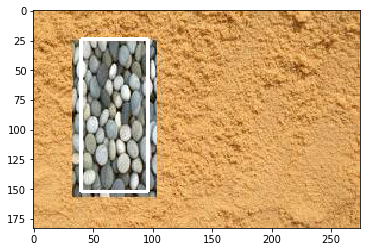

In [50]:
# Draw a rectangle from the points
cv2.rectangle(img, (points_left[0][0], points_left[0][1]), (points_right[len(points_right)-1][0], points_right[len(points_right)-1][1]), (255, 255, 255), 2)
plt.imshow(img)

In [51]:
points_l = []
pooint_r = []
gray = cv2.cvtColor(img[94:128, 158:192], cv2.COLOR_BGR2GRAY)
hist = desc.describe(gray)
prediction = model.predict(hist.reshape(1, -1) )[0]
s=0
        
if prediction == "p" and s==0:
    cv2.rectangle(img, (160, 80), (200, 120), (0, 255, 0), 2)
#points_left.append([x,y])
#points_right.append([x + winW, y + winH])
    s=1
    plt.imshow(img)

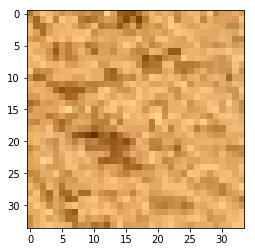

In [52]:
plt.imshow(img[94:128, 158:192])

In [53]:
prediction

's'

In [54]:
winW = 32
winH = 32
points_l = []
points_r = []
s=0
img1 = img[128:192, 128:256]
for (x, y, window) in sliding_window(img1, stepSize=32, windowSize=(winW, winH)):
        # if the window does not meet our desired window size, ignore it
        if window.shape[0] != winH or window.shape[1] != winW:
            continue
 
        # THIS IS WHERE YOU WOULD PROCESS YOUR WINDOW, SUCH AS APPLYING A
        # MACHINE LEARNING CLASSIFIER TO CLASSIFY THE CONTENTS OF THE
        # WINDOW
 
        # since we do not have a classifier, we'll just draw the window
        #clone = resized.copy()
        gray = cv2.cvtColor(window, cv2.COLOR_BGR2GRAY)
        hist = desc.describe(gray)
        prediction = model.predict(hist.reshape(1, -1) )[0]
        #print(prediction)
        #s=0
        
        if prediction == "p":
            cv2.rectangle(img1, (x, y), (x + winW, y + winH), (0, 255, 0), 0)
            points_l.append([x,y])
            points_r.append([x + winW, y + winH])
            s=1
            plt.imshow(img1)

In [55]:
# Draw a rectangle from the points
cv2.rectangle(img1, (points_l[0][0], points_l[0][1]), (points_r[len(points_r)-1][0], points_r[len(points_r)-1][1]), (255, 255, 255), 2)
plt.imshow(img1)

IndexError: list index out of range

In [ ]:
plt.imshow(img[128:192, 128:256])

In [ ]:
cv2.imwrite("output.png", img)